In [36]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

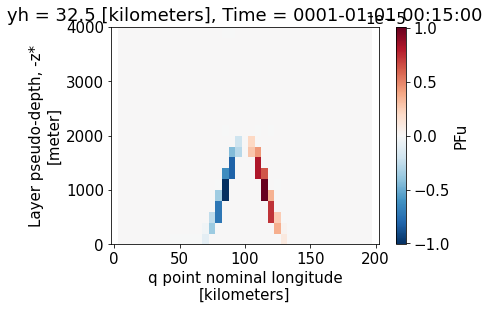

In [54]:
mom = xr.open_dataset('mom.nc')
mom2 = xr.open_dataset('intxpa-testing/mom-zstar-minthick1e-12-intxpa-mwipg.nc')
(mom.PFu.isel(Time = 0, yh = 0) - mom2.PFu.isel(Time = 0, yh = 0)).plot()
mom.close()
mom2.close()


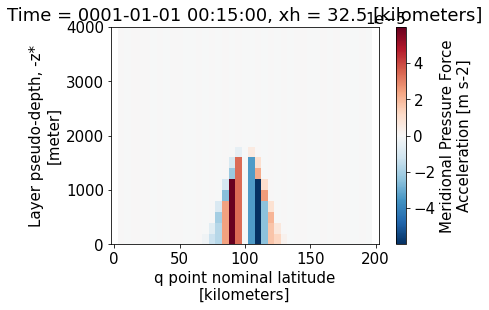

In [57]:
mom = xr.open_dataset('mom.nc')
mom.PFv.isel(Time = 0, xh = 0).plot()
mom.close()

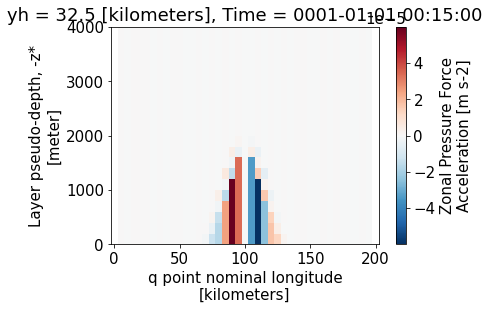

In [43]:
mom = xr.open_dataset('intxpa-testing/mom-zstar-minthick1e-12-intxpa-mwipg.nc')
mom.PFu.isel(Time = 0, yh = 0).plot()
mom.close()

# PFu between top down intxpa and inside out are different...

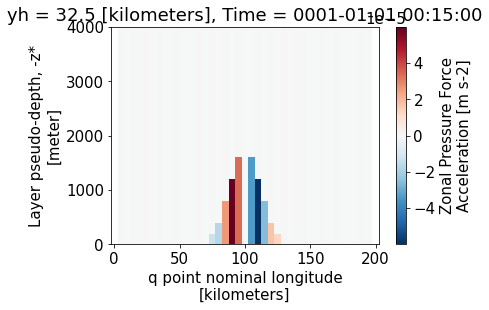

In [44]:
mom = xr.open_dataset('mom.nc')
mom.PFu.isel(Time = 0, yh = 0).plot()
mom.close()

In [37]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/reset-testing'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC
def open_mom(label):
    base = basee 
    IC = xr.open_dataset(base + '/mom-'+label+'.nc')
    return IC

def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    #IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    #plt.colorbar(cax, ax = ax, label = varname)
    plt.colorbar(cax, ax = ax, label = 'u (m/s)')
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


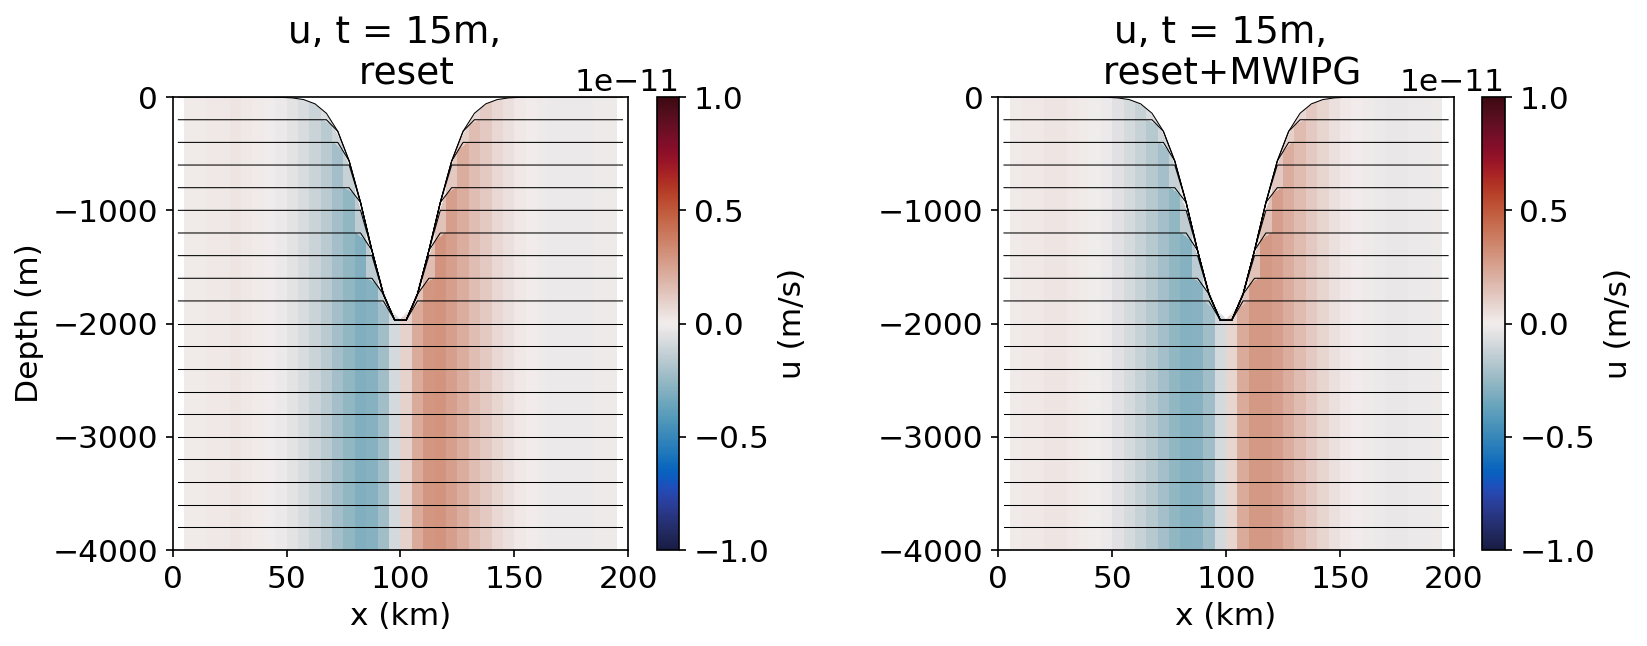

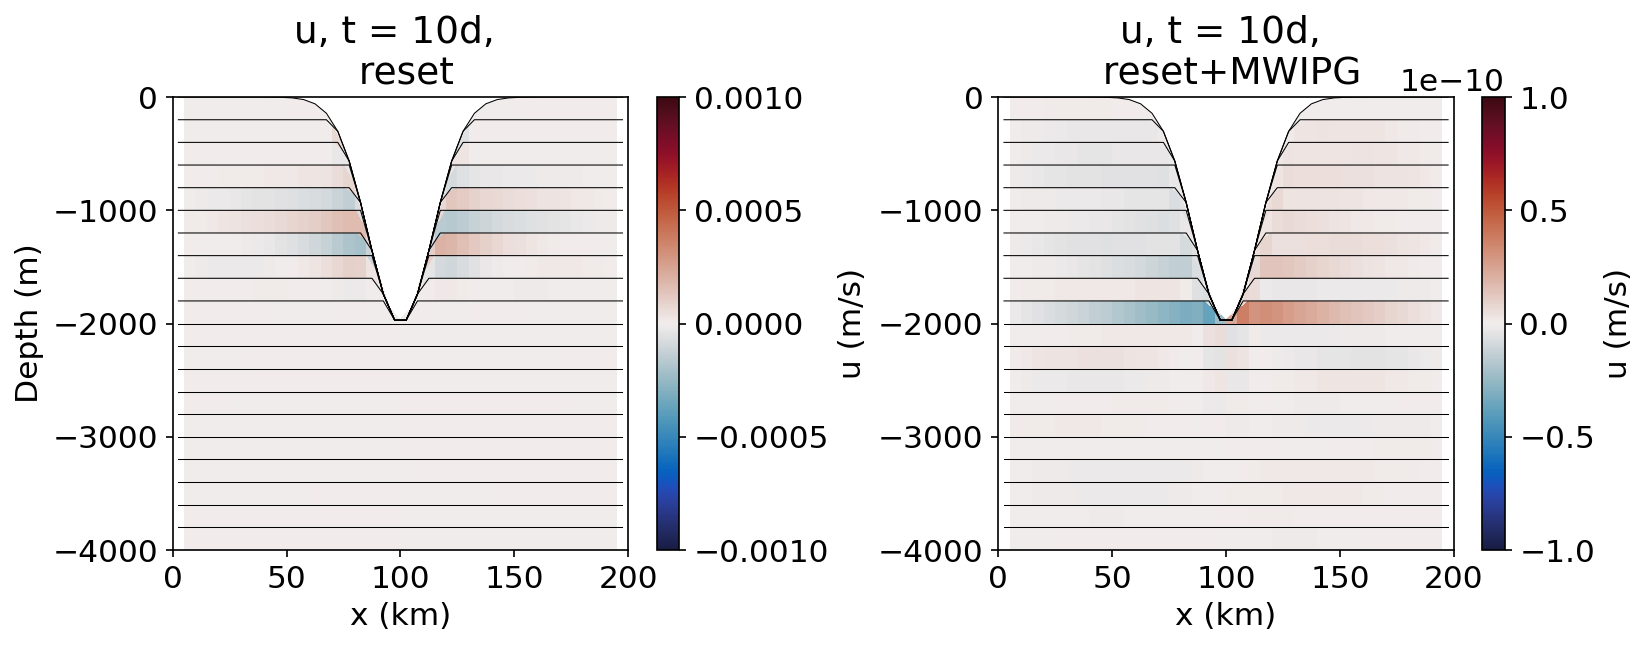

In [20]:
plt.rcParams.update({'font.size': 15})


label = 'reset-nomwipg'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)

label = 'reset-mwipg'
prog = open_files(label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 15m, \n reset')
axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()

label = 'reset-nomwipg'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

label = 'reset-mwipg'
prog = open_files(label)

plot(axes[1],x,time,0,prog.u,"uo",-1e-10,1e-10,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 10d, \n reset')
axes[1].set_title('u, t = 10d, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()



# try bob's idea 

if bounded, choose accel of cell above

for seamount

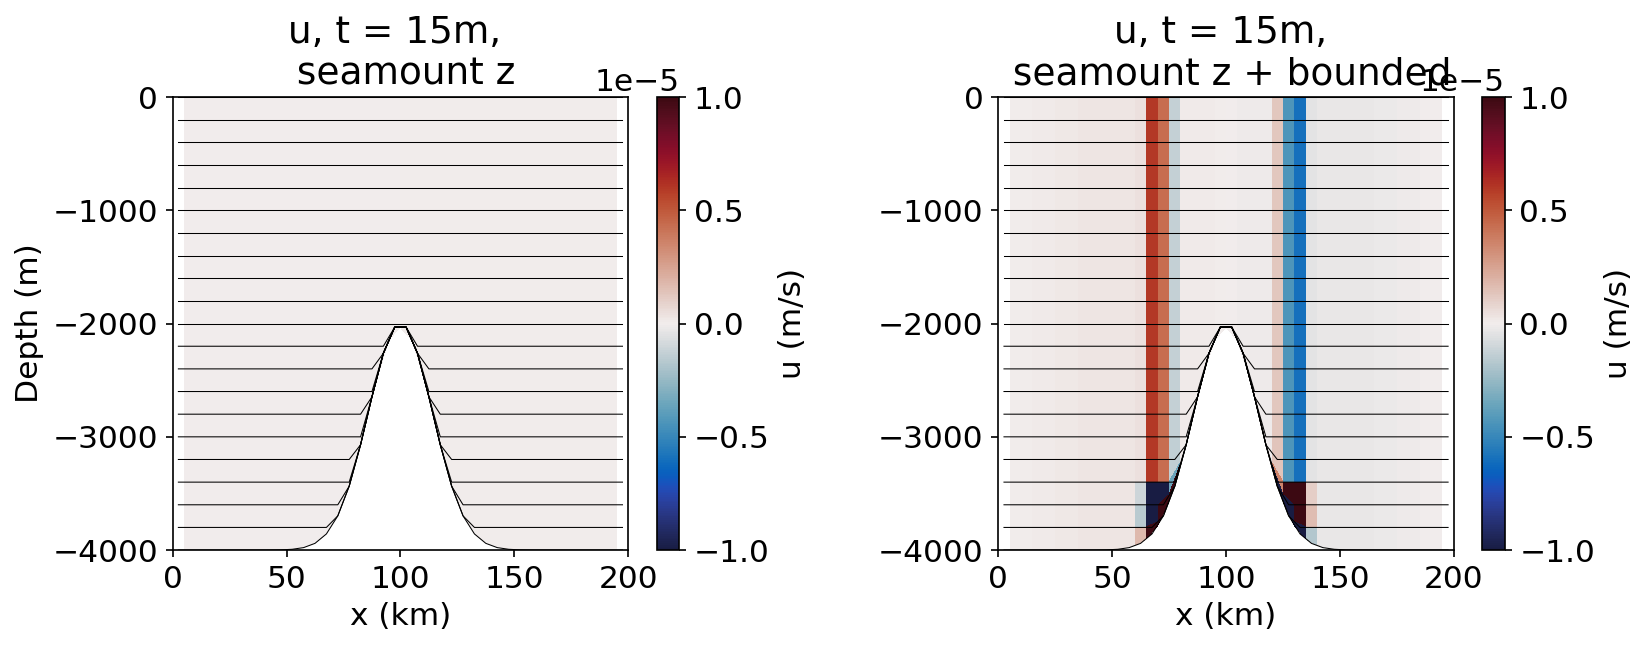

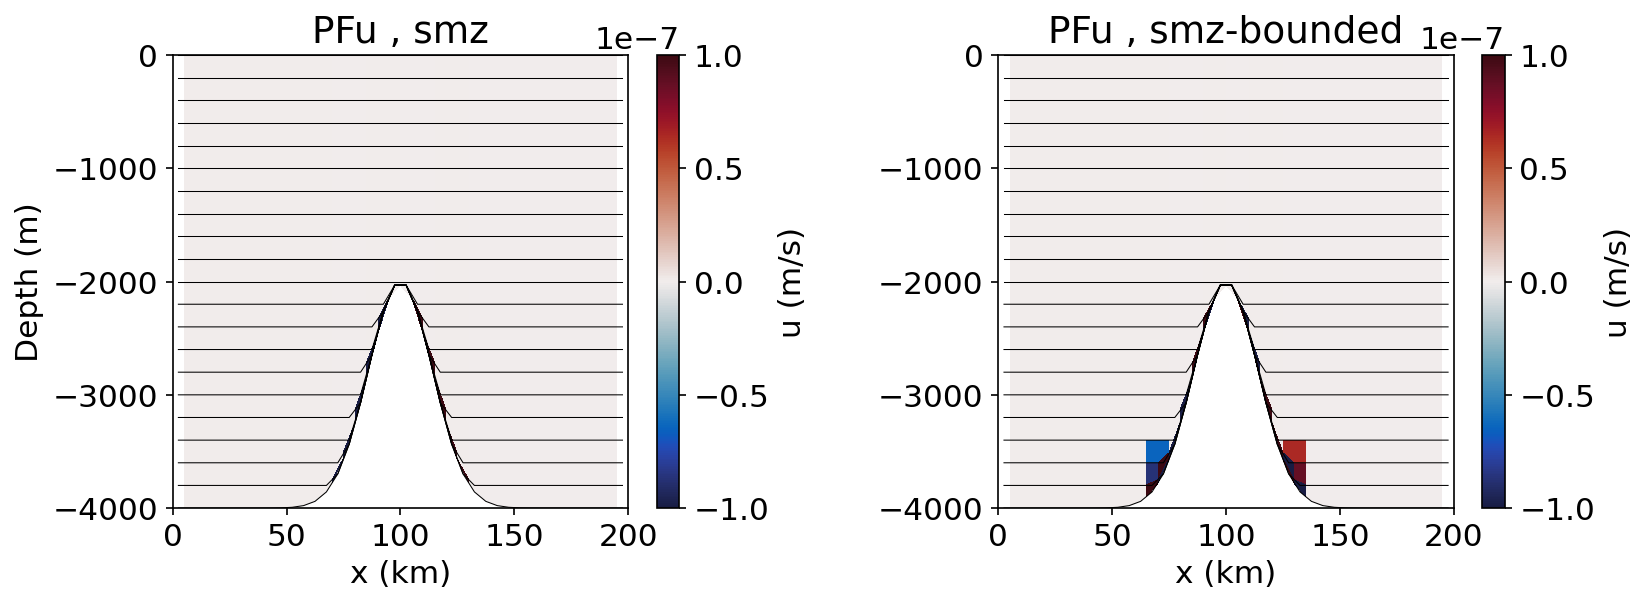

In [35]:
label = 'smz'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = 2#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

label = 'smz-bounded'
prog = open_files(label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-5,1e-5,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 15m, \n seamount z')
axes[1].set_title('u, t = 15m, \n seamount z + bounded')
fig.subplots_adjust(wspace = 0.45)
plt.show()

label = 'smz'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
mom = open_mom(label)
#IC = open_IC(label)
x = 0
time = 2#24*5-1
ymax = 4000
plot(axes[0],x,time,0,mom.PFu,"PFu",-1e-7,1e-7,cm.cm.balance,ymax)

label = 'smz-bounded'
prog = open_files(label)
mom = open_mom(label)
plot(axes[1],x,time,0,mom.PFu,"PFu",-1e-7,1e-7,cm.cm.balance,ymax)

axes[1].set_ylabel('')
#axes[0].set_title('PFu, t = 15m, \n seamount z')
#axes[1].set_title('PFu, t = 15m, \n seamount z + bounded')
fig.subplots_adjust(wspace = 0.45)
plt.show()



# inside out integration

In [ ]:
plt.rcParams.update({'font.size': 15})


label = 'reset-nomwipg'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)

label = 'reset-mwipg'
prog = open_files(label)
plot(axes[1],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 15m, \n reset')
axes[1].set_title('u, t = 15m, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()

label = 'reset-nomwipg'

fig, axes = plt.subplots(ncols = 2, figsize = (12,4),dpi = 150)
prog = open_files(label)
#IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-1e-3,1e-3,cm.cm.balance,ymax)

label = 'reset-mwipg'
prog = open_files(label)

plot(axes[1],x,time,0,prog.u,"uo",-1e-10,1e-10,cm.cm.balance,ymax)

axes[1].set_ylabel('')
axes[0].set_title('u, t = 10d, \n reset')
axes[1].set_title('u, t = 10d, \n reset+MWIPG')
fig.subplots_adjust(wspace = 0.45)
plt.show()



# salinity differences

In [62]:
prog.salt.isel(Time = 0, yh = 0)

<xarray.DataArray 'salt' (zl: 20, xh: 40)>
[800 values with dtype=float32]
Coordinates:
    yh       float64 32.5
  * zl       (zl) float64 100.0 300.0 500.0 700.0 ... 3.5e+03 3.7e+03 3.9e+03
    Time     object 0001-01-01 00:15:00
  * xh       (xh) float64 2.5 7.5 12.5 17.5 22.5 ... 182.5 187.5 192.5 197.5
Attributes:
    long_name:     Salinity
    units:         psu
    cell_methods:  area:mean zl:mean yh:mean xh:mean time: point

Text(0.5, 1.0, 'Salt anomaly')

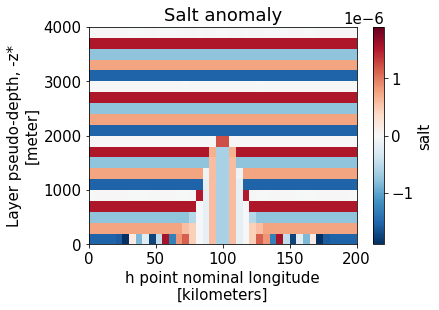

In [83]:
prog = xr.open_dataset('prog.nc')
IC = xr.open_dataset('MOM_IC.nc')

(prog.salt.isel(Time = 0, yh = 0)-IC.Salt.isel(lath = 0,Time = 0).values).plot()
plt.title('Salt anomaly')

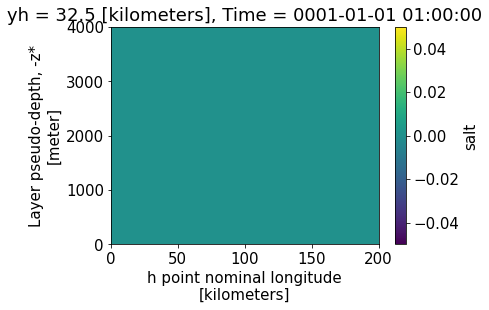

In [84]:
prog = xr.open_dataset('prog.nc')
IC = xr.open_dataset('MOM_IC.nc')

(prog.salt.isel(Time = 3, yh = 0)-prog.salt.isel(Time = 0, yh = 0).values).plot()

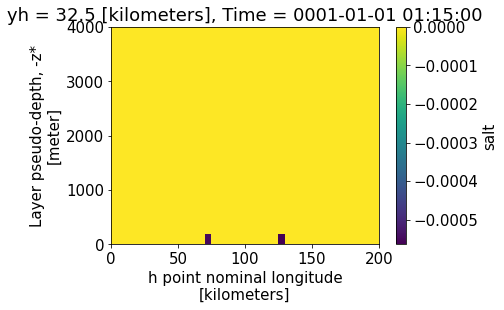

In [85]:
prog = xr.open_dataset('prog.nc')
IC = xr.open_dataset('MOM_IC.nc')

(prog.salt.isel(Time = 4, yh = 0)-prog.salt.isel(Time = 0, yh = 0).values).plot()

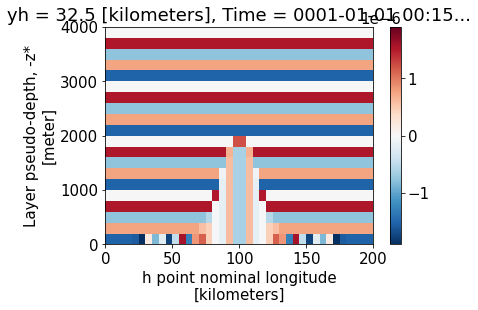

In [86]:
ideal_salt = xr.zeros_like(prog.salt) + (prog.e.isel(zi = 0)-prog.h.cumsum('zl')+prog.h/2)*(34.55-33.8)/(-4000) + 33.8
(prog.salt-ideal_salt).isel(Time = 0,yh = 0).plot()

Text(0.5, 0, 'x (km)')

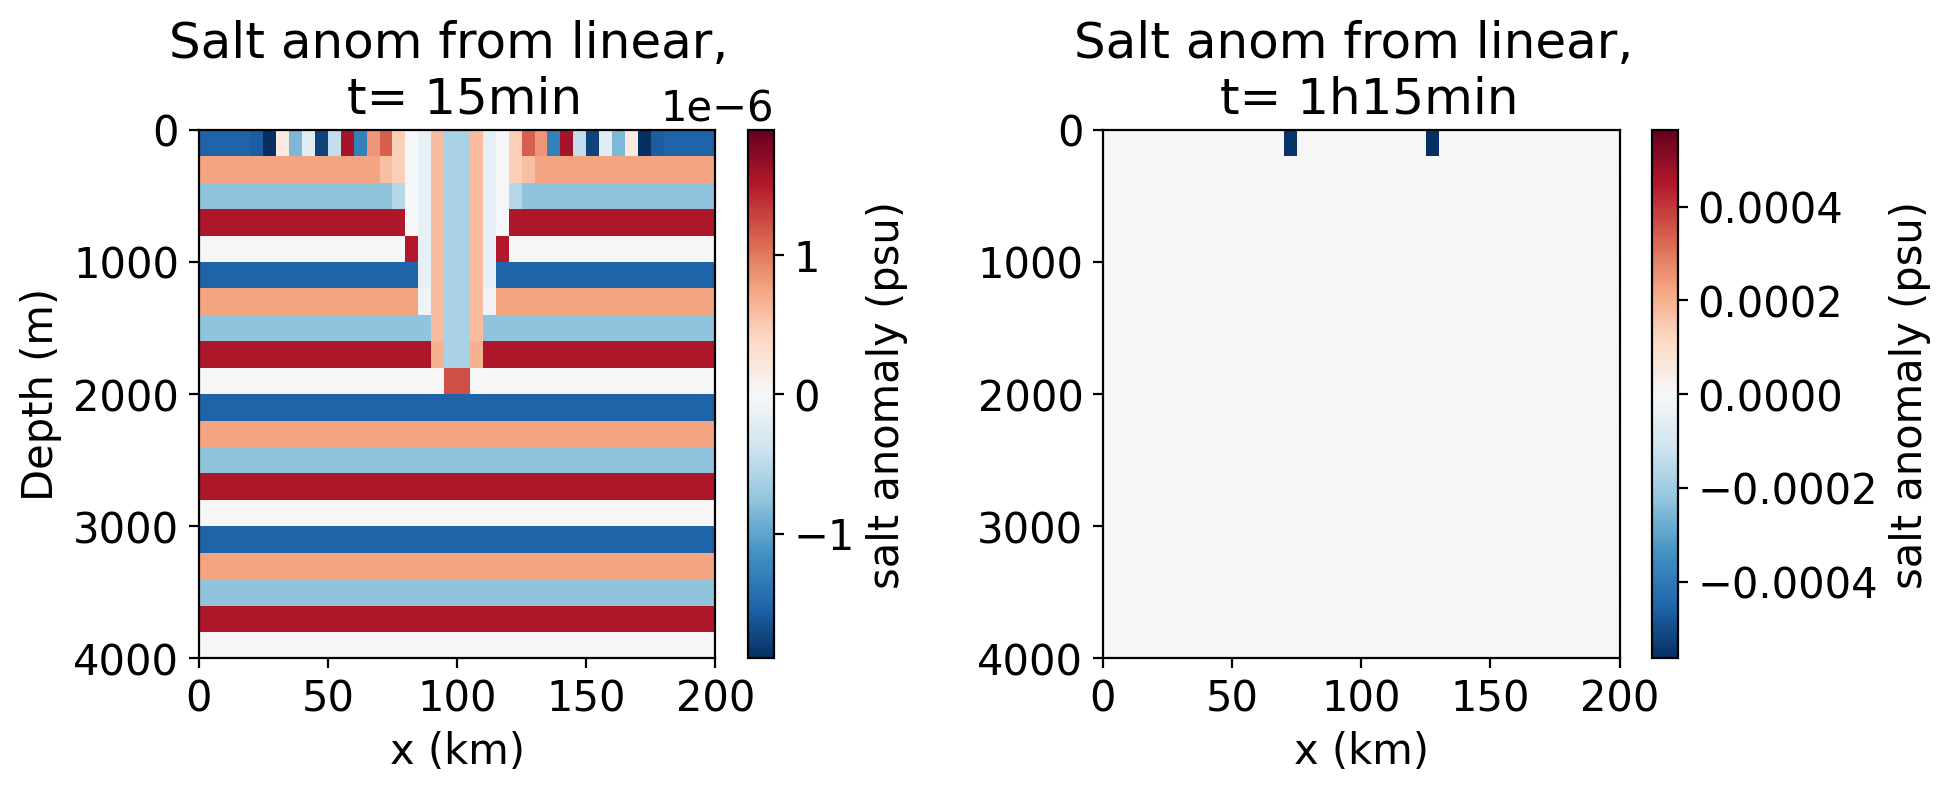

In [101]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,3.5),dpi = 200)
ideal_salt = xr.zeros_like(prog.salt) + (prog.e.isel(zi = 0)-prog.h.cumsum('zl')+prog.h/2)*(34.55-33.8)/(-4000) + 33.8
(prog.salt-ideal_salt).isel(Time = 0,yh = 0).plot(ax = axes[0],yincrease = False, cbar_kwargs = {'label':'salt anomaly (psu)'})
(prog.salt-ideal_salt).isel(Time = 4,yh = 0).plot(ax = axes[1],yincrease = False, cbar_kwargs = {'label':'salt anomaly (psu)'})

fig.subplots_adjust(wspace = 0.4)

axes[0].set_title('Salt anom from linear, \n t= 15min')
axes[1].set_title('Salt anom from linear, \n t= 1h15min')
axes[0].set_ylabel('Depth (m)')
axes[1].set_ylabel('')
axes[0].set_xlabel('x (km)')
axes[1].set_xlabel('x (km)')


## prog.u#.isel(Time = 4, yh = 0).plot()